In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/DATA FILES/movie recommendation/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATA FILES/movie recommendation/tmdb_5000_movies.csv')

In [4]:
# joining the 2 databases using the id coloumn which is common in both of them
df1.columns = ['id', 'title', 'cast', 'crew']
df2 = df2.merge(df1, on='id')

In [5]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


DEMOGRAPHIC FILTERING

In [6]:
C = df2['vote_average'].mean()
C
# here, C is the eman vote across the report, ie all the movie rating avg vote is 6.09

6.092171559442016

In [7]:
# now we calculate m which is the min number of vote counts to be acceptabe for a movie, since a very small number of votes cannot be considered enough
m = df2['vote_count'].quantile(0.9)
m
# this shows that we're considering the count only above 90 percentile
# ie, a min of 1839 votes is needed, for the vote count to be valid and precise

1838.4000000000015

In [8]:
# finding the movies that qualify for the task:
# q_movies is the variable list for qualified movies
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape
# here, q_movies is another data frame
# here we're making a copy of the original df2 frame and making the changes so that the original df is not altered
# the loc func is giving the location of the thing to be changed ie vote_count

(481, 23)

In [9]:
# now we'll calculate the final main rating based on the criteria we got and considering all the factors we just created
# v = vote count, r = vote avg, c = rating mean, m = min vote count
# using the formula given by imdb:
def weighted_rating(x, m=m, C=C):
  v = x['vote_count']    # This line extracts the 'vote_count' value from the row x, which represents the number of votes the movie has received.
  r = x['vote_average']
  return (v/(v+m)*r)+(m/(m+v)*C)

# here, the x is a row in the data frame which contains the info abt a single movie

In [10]:
# defining a new feature score and calculating its value with the weighted rating
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
# aka, we're creating a column in q_movies called score and applying the values of the weighted_rating to this column

In [11]:
# now lets sort them and get the highest rated 15 movies
q_movies = q_movies.sort_values('score', ascending = False)
q_movies = q_movies[['original_title', 'vote_count', 'vote_average', 'score']]
q_movies.head(15)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'popular movies')

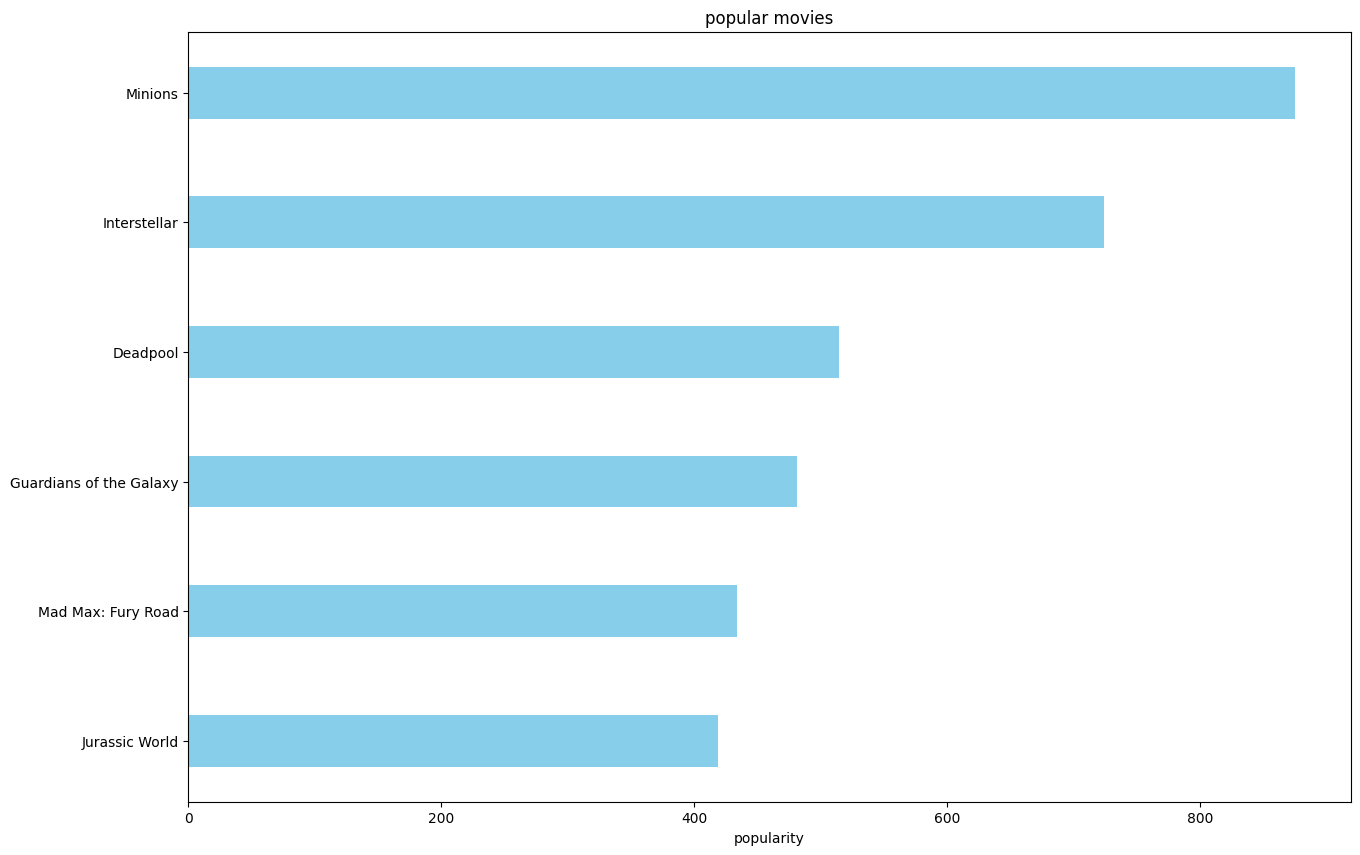

In [12]:
pop = df2.sort_values('popularity', ascending = False)
# here, we're making a new df called pop based on the popularity column from df2 by sorting it in descending order
plt.figure(figsize = (15,10))
plt.barh(pop['original_title'].head(6), pop['popularity'].head(6), height = 0.4,  align='center', color = 'skyblue')
# this line says that we're creating a horizontal bar chart. we're plotting the popularity values on y axis and the titles on x axis for the top 6 popular movies
plt.gca().invert_yaxis()
# thus line helps invert the graph based on the y axis so that the most popular movie is displayed at he top
plt.xlabel("popularity")
plt.title("popular movies")

CONTENT BASED FILTERING

In [13]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
# this vectoriser classifies all common words into matrices by priority
tfidf = TfidfVectorizer(stop_words = 'english')
# tfidf means overall imp of words present in the docs
# removing the english words like the, a etc will help in shortening the process
df2['overview'] = df2['overview'].fillna('')
# replacing the null data with an empty string
# now we are constructing the tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

this shows that over 20,000 different words were used to describe the 4800 movies in the dataset
so we'll use a similarity formula to find the similarity score that defines the similarity between 2 movies
its given by:
ss = cos(x) = A.B/||A||B||

In [15]:
# to calculate dot product n all
from sklearn.metrics.pairwise import linear_kernel
# computing the similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [16]:
indices = pd.Series(df2.index, index=df2['original_title']).drop_duplicates()
# this helps getting the index of a movie given its title

In [17]:
# function that takes input as name and gives output as the top 10 movies most similar to it
def get_rec(original_title, cosine_sim=cosine_sim):
  # getting the index of the movie that matches the title
  idx = indices[original_title]
  # getting the pairwise similarity scores of all movies with that movie
  sim_scores = list(enumerate(cosine_sim[idx]))  #enumerate adds an index to each element in an iterable
  # sorting the movies based on similarity scores
  sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
  # get the scores of the top 10 most similar movies
  sim_scores = sim_scores[1:11]
  # get the movie indices
  movie_indices = [i[0] for i in sim_scores]
  # here, movie_indices is a list being created where the indices of movies are sorted based on the ss as stored in the sim_scores tuple
  # that loop basically iterates thru the first element of each tuple and creates the list which only contains the indices of the movies sorted by the ss
  return df2['original_title'].iloc[movie_indices]  #the title column is selected from the df resulting in a series that contains movie titles
  # here, the rows that are represented by the title with the same index are returned using the iloc

In [18]:
get_rec('Harry Potter and the Chamber of Secrets')

191      Harry Potter and the Prisoner of Azkaban
114           Harry Potter and the Goblet of Fire
113     Harry Potter and the Order of the Phoenix
8          Harry Potter and the Half-Blood Prince
197      Harry Potter and the Philosopher's Stone
4729                         Dude Where's My Dog?
906             Anchorman 2: The Legend Continues
240                                  Dante's Peak
3343                             Live and Let Die
2885                                 Married Life
Name: original_title, dtype: object

In [19]:
get_rec('Iron Man')

79                     Iron Man 2
31                     Iron Man 3
1868           Cradle 2 the Grave
7         Avengers: Age of Ultron
538                       Hostage
119                 Batman Begins
1290     Baahubali: The Beginning
4574                     Roadside
2044           The Little Vampire
2633    The Clan of the Cave Bear
Name: original_title, dtype: object

In [20]:
get_rec('Baahubali: The Beginning')

2375                            Midnight Special
3402                            Снежная королева
4491               The Hadza:  Last of the First
80                   Snow White and the Huntsman
2912                                   Star Wars
3649                               Lovely, Still
3334                                        Juno
3506                                   Don McKay
4739                 I Love You, Don't Touch Me!
1045    The Princess Diaries 2: Royal Engagement
Name: original_title, dtype: object

In [21]:
get_rec('A Walk to Remember')

3595        Halloween: The Curse of Michael Myers
1638                           Love & Other Drugs
2380                                   The Wraith
3469    Halloween 5: The Revenge of Michael Myers
3600     Halloween 4: The Return of Michael Myers
1384                        Friends with Benefits
4159                                 River's Edge
444                             Road to Perdition
4023                           My Life Without Me
2238                                     Bandslam
Name: original_title, dtype: object

In [22]:
get_rec("About Time")

623       Dinner for Schmucks
3368       Outside Providence
2117                Boogeyman
2743     The Butterfly Effect
752       My Favorite Martian
1533       Hearts in Atlantis
3069            Danny Collins
144     Mr. Peabody & Sherman
4346             Transamerica
812                Pocahontas
Name: original_title, dtype: object